In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
df=pd.read_csv('/content/NSE3Y.csv',index_col='Date',parse_dates=True)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-18,14453.299805,14459.150391,14222.799805,14281.299805,14281.299805,762000.0
2021-01-19,14371.650391,14546.049805,14350.849609,14521.150391,14521.150391,546100.0
2021-01-20,14538.299805,14666.450195,14517.549805,14644.700195,14644.700195,623100.0
2021-01-21,14730.950195,14753.549805,14517.250000,14590.349609,14590.349609,704600.0
2021-01-22,14583.400391,14619.900391,14357.750000,14371.900391,14371.900391,776800.0
2021-01-25,14477.799805,14491.099609,14218.599609,14238.900391,14238.900391,618600.0
2021-01-27,14237.950195,14237.950195,13929.299805,13967.500000,13967.500000,660700.0
2021-01-28,13810.400391,13898.250000,13713.250000,13817.549805,13817.549805,637900.0
2021-01-29,13946.599609,13966.849609,13596.750000,13634.599609,13634.599609,753200.0


In [ ]:
df = df.asfreq(freq='D', method='ffill')

In [ ]:
df.index

DatetimeIndex(['2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27',
               ...
               '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09',
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
               '2024-01-14', '2024-01-15'],
              dtype='datetime64[ns]', name='Date', length=1093, freq='D')

In [ ]:
df=df.dropna()

<Axes: xlabel='Date'>

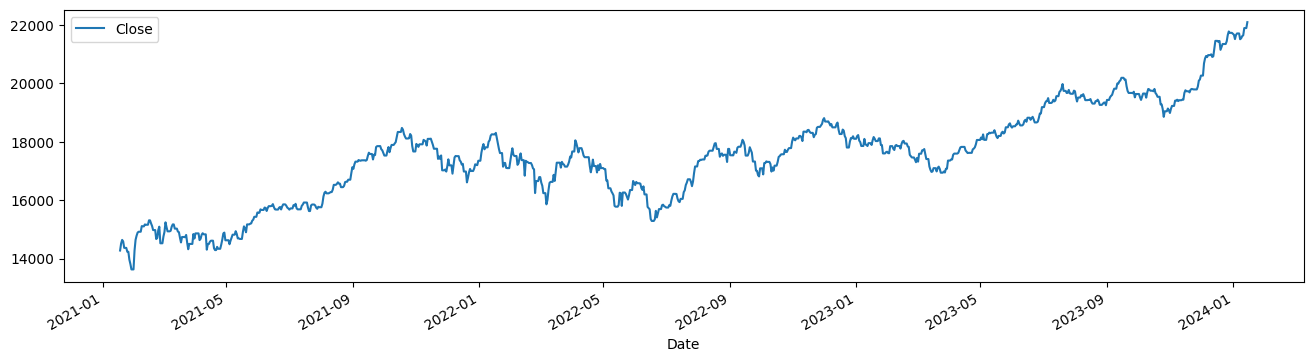

In [ ]:
df['Close'].plot(figsize=(16,4),legend=True)

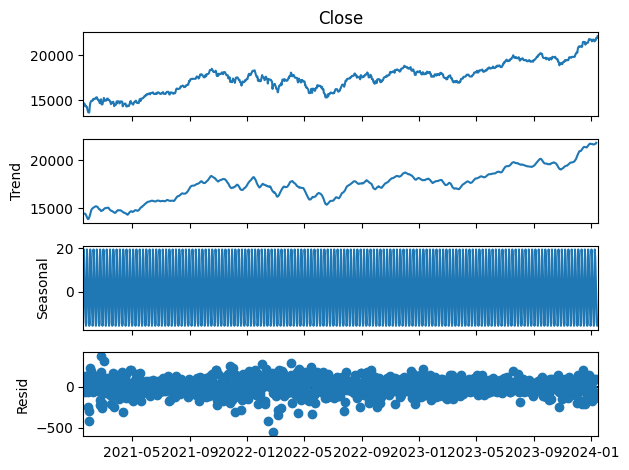

In [ ]:
#checking for seasonalty and trend
from statsmodels.tsa.seasonal import seasonal_decompose
res=seasonal_decompose(df['Close'])
res.plot();

<Axes: xlabel='Date'>

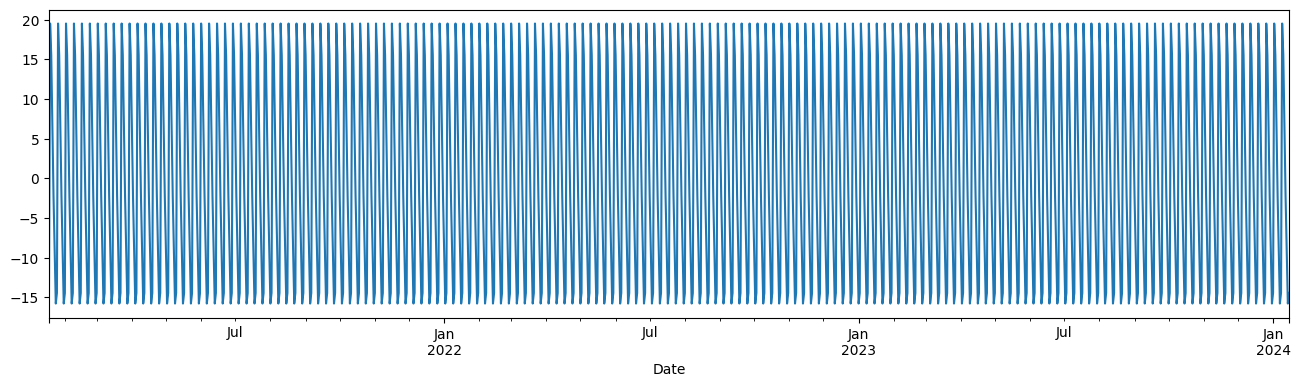

In [ ]:
res.seasonal.plot(figsize=(16,4)) #show very low seasonalty

In [ ]:
len(df)

1093

In [ ]:
len(df)-7

1086

In [ ]:
#taking one month as testing data
train=df[:1086]
test=df[1086:]

In [ ]:
test.shape

(7, 6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaled_train=scaler.fit_transform(train['Close'].values.reshape(-1,1))
scaled_test=scaler.transform(test['Close'].values.reshape(-1,1))

In [ ]:
n_inputs=5
n_features=1

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(200,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [ ]:
model.fit_generator(train_generator,epochs=30)

Epoch 1/30


<ipython-input-41-442bce6c9dca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=30)


1081/1081 [==============================] - 14s 11ms/step - loss: 0.0032
Epoch 2/30
1081/1081 [==============================] - 11s 11ms/step - loss: 0.0015
Epoch 3/30
1081/1081 [==============================] - 10s 10ms/step - loss: 0.0012
Epoch 4/30
1081/1081 [==============================] - 11s 10ms/step - loss: 0.0010
Epoch 5/30
1081/1081 [==============================] - 10s 10ms/step - loss: 0.0011
Epoch 6/30
1081/1081 [==============================] - 10s 9ms/step - loss: 8.7372e-04
Epoch 7/30
1081/1081 [==============================] - 11s 10ms/step - loss: 0.0010
Epoch 8/30
1081/1081 [==============================] - 10s 9ms/step - loss: 8.8121e-04
Epoch 9/30
1081/1081 [==============================] - 11s 11ms/step - loss: 6.8109e-04
Epoch 10/30
1081/1081 [==============================] - 11s 10ms/step - loss: 9.7774e-04
Epoch 11/30
1081/1081 [==============================] - 10s 9ms/step - loss: 6.3563e-04
Epoch 12/30
1081/1081 [==============================] - 

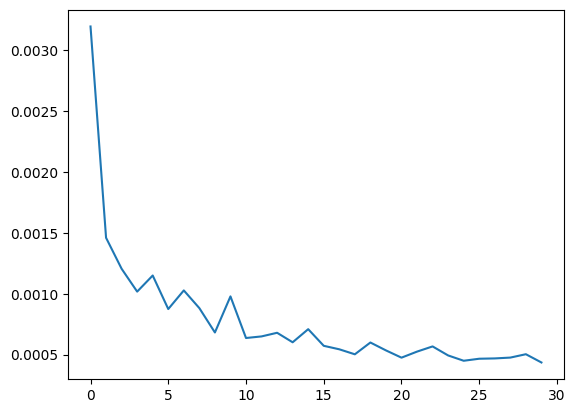

In [ ]:
myloss=model.history.history['loss']
plt.plot(range(len(myloss)),myloss)

In [ ]:
first_eval_batch=scaled_train[-5:].reshape((1,n_inputs,n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 252ms/step


array([[0.9684824]], dtype=float32)

In [ ]:
scaled_test

array([[0.97128601],
       [0.98035387],
       [0.98385334],
       [1.01422521],
       [1.01422521],
       [1.01422521],
       [1.03913876]])

In [ ]:

test_predictions=[]

first_eval_batch=scaled_train[-n_inputs:]

current_batch=first_eval_batch.reshape((1,n_inputs,n_features))

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



1/1 [==============================] - 0s 28ms/step


In [ ]:
test_predictions

[array([0.9684824], dtype=float32),
 array([0.9780069], dtype=float32),
 array([0.9880817], dtype=float32),
 array([0.9975002], dtype=float32),
 array([1.006431], dtype=float32),
 array([1.0154369], dtype=float32),
 array([1.0248042], dtype=float32)]

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[21522.01654271],
       [21599.58521663],
       [21681.6353449 ],
       [21758.34044567],
       [21831.07378957],
       [21904.41877043],
       [21980.70737556]])

In [ ]:
test['predictions']=true_predictions

<ipython-input-50-5cc117e29ae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


<Axes: xlabel='Date'>

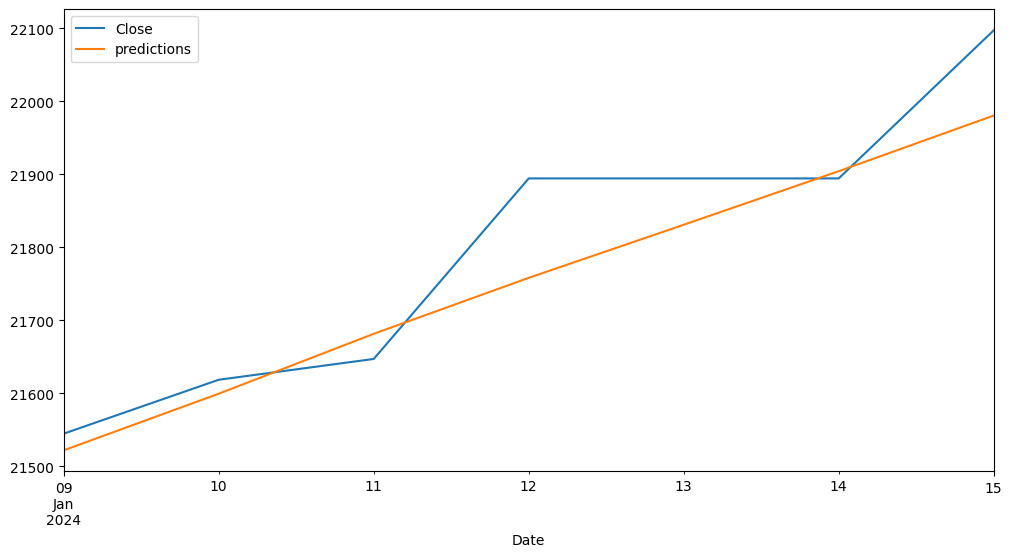

In [ ]:
test[['Close','predictions']].plot(legend=True,figsize=(12,6))


In [ ]:
test[['Close','predictions']]

,Close,predictions
Date,,
2024-01-09,21544.849609,21522.016543
2024-01-10,21618.699219,21599.585217
2024-01-11,21647.199219,21681.635345
2024-01-12,21894.550781,21758.340446
2024-01-13,21894.550781,21831.073790
2024-01-14,21894.550781,21904.418770
2024-01-15,22097.449219,21980.707376
